In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_index = pd.read_csv('economic_index.csv')

In [4]:
df_index.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2016,1,4.06,3.15,657.51
1,2016,2,2.39,7.42,693.24
2,2016,3,5.07,3.52,625.28
3,2016,4,1.62,4.31,790.77
4,2016,5,1.61,4.19,823.78


In [15]:
# here year and month columns are extra not required.. basend on interest rate and unemploymentrate we need to find the index_price
# drop year and month
df_index = df_index.drop(columns=["year", "month"], axis=0)


In [16]:
# check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

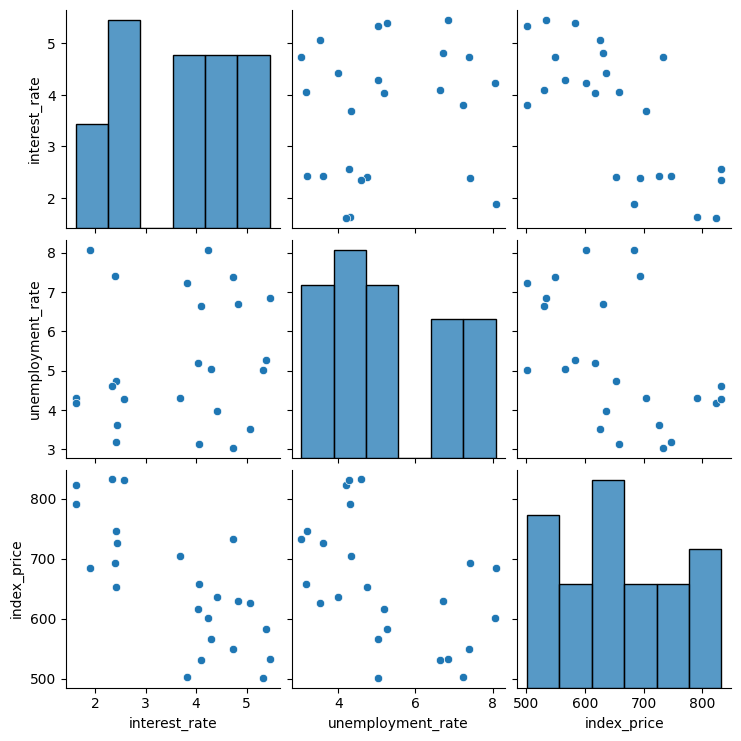

In [17]:
# lets do some visualization 
import seaborn as sns

sns.pairplot(df_index)

In [18]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.118983,-0.747155
unemployment_rate,0.118983,1.000000,-0.496580
index_price,-0.747155,-0.496580,1.000000


Text(0, 0.5, 'unemployment_rate')

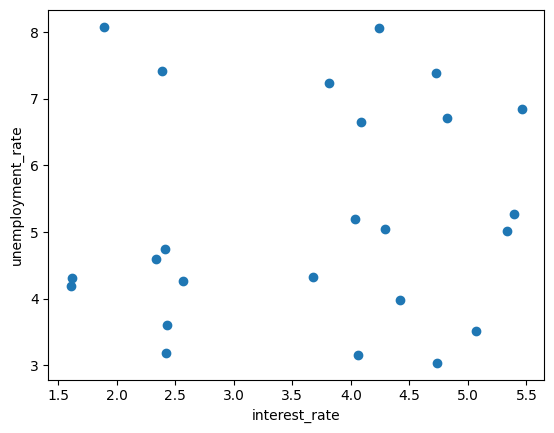

In [20]:
# visualize the datapoints more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'])
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [21]:
# independent and dependent features
X = df_index[['interest_rate', 'unemployment_rate'] ] # or X = df_index.iloc[:,:,-1]
y = df_index.iloc[:,-1]

In [23]:
X.head()


,interest_rate,unemployment_rate
0,4.06,3.15
1,2.39,7.42
2,5.07,3.52
3,1.62,4.31
4,1.61,4.19


In [24]:
y.head()

0    657.51
1    693.24
2    625.28
3    790.77
4    823.78
Name: index_price, dtype: float64

In [26]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y , test_size=0.25, random_state=42)

In [27]:
import seaborn as sns


In [29]:
sns.regplot(df_index['interest_rate'], df_index['index_price'])

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [30]:
from sklearn.preprocessing import StandardScaler


In [33]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [34]:
X_train

array([[ 0.24948958,  1.30316582],
       [-0.9036666 ,  1.42141541],
       [ 0.59868476,  1.81972983],
       [ 0.14391894, -0.50792003],
       [ 1.27271267, -1.00581305],
       [ 1.06969221,  0.97953536],
       [-0.87118333, -0.94980008],
       [-1.5289696 , -0.51414369],
       [-1.53709042, -0.58882764],
       [-0.87930414, -1.21119392],
       [-0.94427069, -0.33365747],
       [ 1.58942458,  1.06044297],
       [-0.75749187, -0.53903834],
       [ 0.63928885, -0.05981631],
       [ 0.99660485,  1.39652076],
       [-0.88742496, -0.2465262 ],
       [ 0.74485949, -0.71952456],
       [ 1.00472567, -1.30454886]])

In [35]:
X_test

array([[ 1.03249625, -0.35530417],
       [-0.08052896, -0.24344915],
       [-0.06327275, -1.58570935],
       [-0.03738844,  0.71718805],
       [ 1.08426486, -0.1908115 ],
       [-1.93557096,  1.65808612]])

In [36]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [37]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [40]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train,scoring='neg_mean_squared_error', cv =5 )

In [42]:
validation_score

array([-3449.15569148, -2345.93962251, -2959.95179863, -4846.0125937 ,
       -5601.53567795])

In [43]:
# prediction
y_pred = regression.predict(X_test)

In [44]:
y_pred

array([627.29724948, 692.01341495, 748.83222555, 647.88196808,
       616.96757222, 725.89423638])

In [45]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae= mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

7780.031326217646
81.1161111111111
88.20448586221477


In [ ]:
from sklearn.metrics import r2_score
score  = r2_score(y_test, y_pred)
print(score)

-0.8412989433420721


In [49]:
# display adjusted r-square
print(1- (1-score)*(len(y_test)-1)/(len(y_test)- X_test.shape[1]-1))


-2.0688315722367867


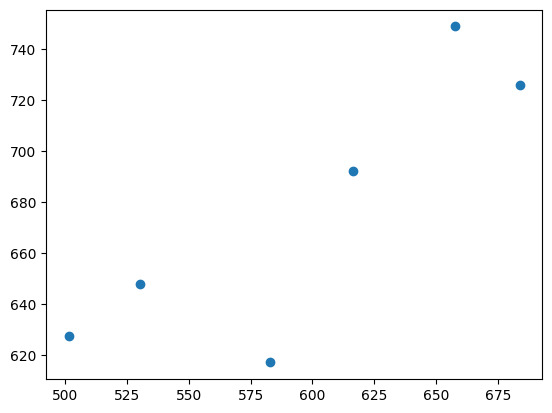

In [50]:
# assumptions
plt.scatter(y_test, y_pred)

In [51]:
residuals = y_test-y_pred
print(residuals)

8    -125.847249
16    -75.673415
0     -91.322226
18   -117.651968
11    -34.157572
9     -42.044236
Name: index_price, dtype: float64


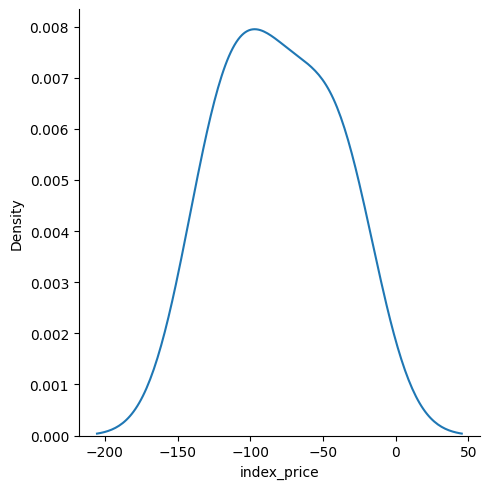

In [52]:
## plot this residulas
sns.displot(residuals, kind='kde')

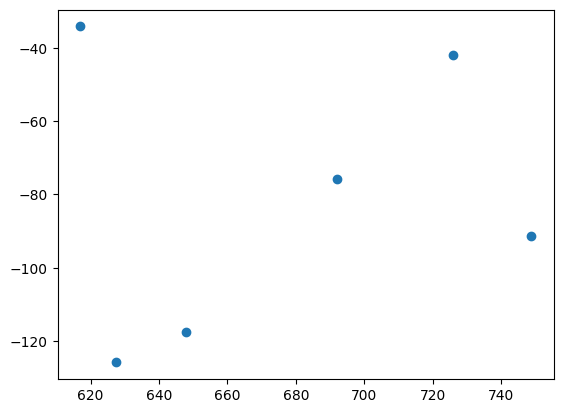

In [53]:
# scatter plot wrt prediction and residuals
plt.scatter(y_pred, residuals)